`USECASE` : Given various features about a customer like Age, Income, Loan Amount, Loan Intent, Home Ownership etc.. , predict if in case the loan is given, will the customer default or not on the Loan payments.

`TASK` : This is an open ended question. Kindly apply all your knowledge to perform an exploratory data analysis on the given dataset. It is known that the target variable is Loan Status.

# Loan Prediction

### `1.` Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:

dataset = pd.read_csv("credit_risk_dataset.csv")

In [3]:
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
dataset = dataset[["person_age","cb_person_cred_hist_length","person_income","person_home_ownership","person_emp_length","loan_intent",
                  "loan_grade","loan_amnt","loan_int_rate","loan_status","cb_person_default_on_file"]]

In [5]:
dataset

,person_age,cb_person_cred_hist_length,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file
0,22,3,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y
1,21,2,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N
2,25,3,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N
3,23,2,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N
4,24,4,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,30,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,N
32577,54,19,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,N
32578,65,28,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,N
32579,56,26,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,N


In [6]:
dataset.describe()

,person_age,cb_person_cred_hist_length,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000
mean,27.734600,5.804211,6.607485e+04,4.789686,9589.371106,11.011695,0.218164
std,6.348078,4.055001,6.198312e+04,4.142630,6322.086646,3.240459,0.413006
min,20.000000,2.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000
25%,23.000000,3.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000
50%,26.000000,4.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000
75%,30.000000,8.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000
max,144.000000,30.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000


In [7]:
df = dataset

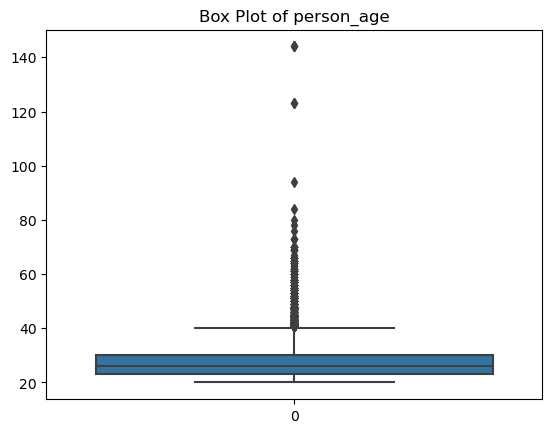

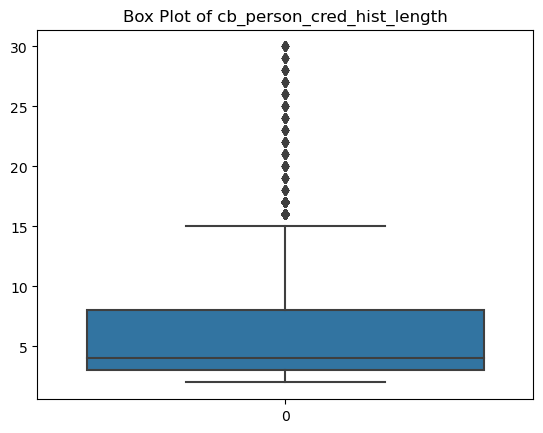

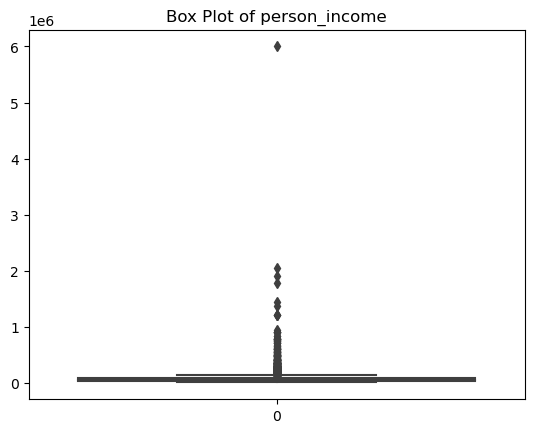

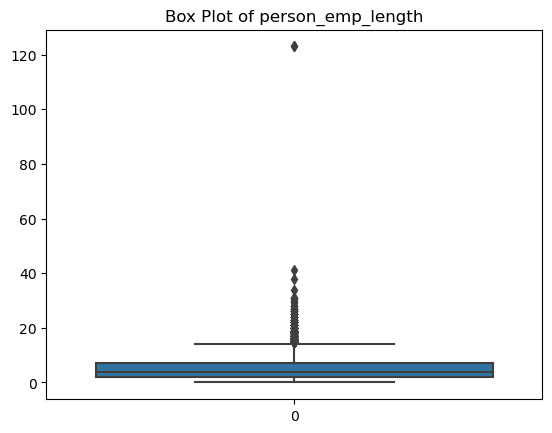

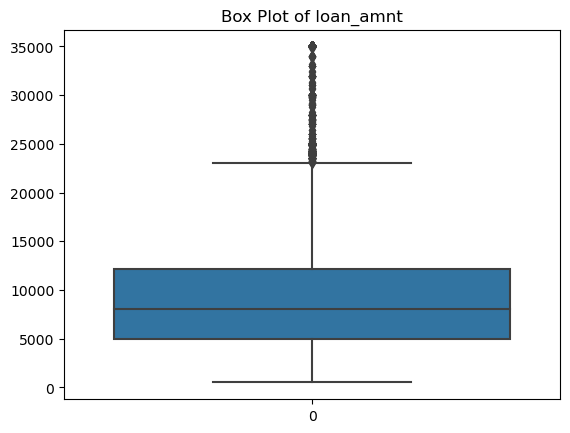

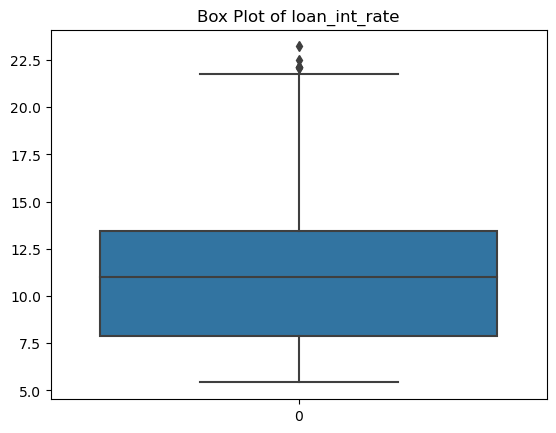

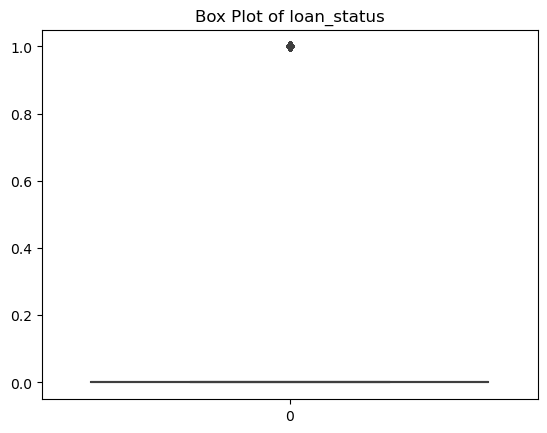

In [8]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    #plt.figure(figsize=(8, 6))
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [9]:
import pandas as pd
import numpy as np

def find_outliers_iqr(df, threshold=1.5, exclude_columns=[]):
    
    numerical_columns = df.select_dtypes(include=[np.number]).columns  # Select numerical columns
    numerical_columns = [col for col in numerical_columns if col not in exclude_columns]
    outliers = pd.DataFrame()
    
    outlier_counts = {}  # To store the count of outliers in each column
    
    for column in numerical_columns:
        
        quartile_1 = df[column].quantile(0.25)
        quartile_3 = df[column].quantile(0.75)
        iqr = quartile_3 - quartile_1
        
        if column == "person_age":
            
            lower_bound = quartile_1 - (threshold * iqr)
            upper_bound = quartile_3 + (3*threshold * iqr)
        else:
            lower_bound = quartile_1 - (2*threshold * iqr)
            upper_bound = quartile_3 + (2*threshold * iqr)
            
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers], axis=0)
        
        outlier_count = column_outliers.shape[0]
        outlier_counts[column] = outlier_count
    
    unique_outliers = outliers.drop_duplicates()
    
    return unique_outliers, outlier_counts



In [10]:
exclude_columns = ['loan_status']
unique_outliers, outlier_counts = find_outliers_iqr(df, exclude_columns=exclude_columns)

In [11]:
outlier_counts, len(unique_outliers)

({'person_age': 61,
  'cb_person_cred_hist_length': 149,
  'person_income': 433,
  'person_emp_length': 54,
  'loan_amnt': 192,
  'loan_int_rate': 0},
 790)

In [12]:
len(unique_outliers)/len(df)*100

2.4247260673398605

In [13]:
df_without_outliers = df.drop(unique_outliers.index) #Removing outliers
df_without_outliers.to_csv("df_without_outliers.csv")

In [14]:
columns_with_null = df_without_outliers.columns[df_without_outliers.isnull().any()].tolist()        
        
columns_with_null

['person_emp_length', 'loan_int_rate']

In [15]:
df_without_outliers.isnull().sum()

person_age                       0
cb_person_cred_hist_length       0
person_income                    0
person_home_ownership            0
person_emp_length              884
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3040
loan_status                      0
cb_person_default_on_file        0
dtype: int64

In [16]:
def fill_column(df, column_name):
    
    
    if column_name == 'person_emp_length':
        mean_value = df[column_name].mean()
        df[column_name].fillna(mean_value, inplace=True)
    elif column_name == 'loan_int_rate':
        mode_value = df[column_name].mode().iloc[0]
        df[column_name].fillna(mode_value, inplace=True)
   

# Find columns with null values
        
for i in columns_with_null:
    
    # Use the function to fill specific columns
    
    fill_column(df_without_outliers,i)
    
    


In [17]:
df_without_outliers.isnull().sum()

person_age                    0
cb_person_cred_hist_length    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
cb_person_default_on_file     0
dtype: int64

In [18]:
filtered_df = df_without_outliers[df_without_outliers["person_emp_length"]< df_without_outliers["person_age"]]

In [19]:
filtered_df

,person_age,cb_person_cred_hist_length,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file
1,21,2,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N
2,25,3,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N
5,21,2,9900,OWN,2.0,VENTURE,A,2500,7.14,1,N
9,21,3,10000,OWN,6.0,VENTURE,D,1600,14.74,1,N
11,21,2,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,N
...,...,...,...,...,...,...,...,...,...,...,...
32572,52,22,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,N
32573,56,19,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,N
32574,52,19,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,Y
32575,52,20,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,N


In [20]:
df_without_outliers.isnull().sum()

person_age                    0
cb_person_cred_hist_length    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
cb_person_default_on_file     0
dtype: int64

## ONE HOT ENCODING

In [21]:
df_without_outliers = pd.get_dummies(df_without_outliers, columns=['person_home_ownership','loan_intent'])

In [22]:
df_without_outliers

,person_age,cb_person_cred_hist_length,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,2,9600,5.0,B,1000,11.14,0,N,0,0,1,0,0,1,0,0,0,0
2,25,3,9600,1.0,C,5500,12.87,1,N,1,0,0,0,0,0,0,1,0,0
5,21,2,9900,2.0,A,2500,7.14,1,N,0,0,1,0,0,0,0,0,0,1
9,21,3,10000,6.0,D,1600,14.74,1,N,0,0,1,0,0,0,0,0,0,1
11,21,2,10000,2.0,A,4500,8.63,1,N,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32572,52,22,52000,0.0,A,9600,8.49,0,N,0,0,1,0,0,0,0,0,1,0
32573,56,19,90000,0.0,A,7200,6.17,0,N,1,0,0,0,0,0,0,0,1,0
32574,52,19,65004,4.0,D,20000,15.58,1,Y,0,0,0,1,0,0,0,0,1,0
32575,52,20,64500,0.0,B,5000,11.26,0,N,0,0,0,1,0,1,0,0,0,0


# LABEL ENCODING

In [23]:
df_without_outliers['cb_person_default_on_file'] = df_without_outliers['cb_person_default_on_file'].astype('category').cat.codes

In [24]:
df_without_outliers['loan_grade'] = df_without_outliers['loan_grade'].astype('category').cat.codes

# ENCODED DATAFRAME:

In [25]:
df_without_outliers

,person_age,cb_person_cred_hist_length,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,2,9600,5.0,1,1000,11.14,0,0,0,0,1,0,0,1,0,0,0,0
2,25,3,9600,1.0,2,5500,12.87,1,0,1,0,0,0,0,0,0,1,0,0
5,21,2,9900,2.0,0,2500,7.14,1,0,0,0,1,0,0,0,0,0,0,1
9,21,3,10000,6.0,3,1600,14.74,1,0,0,0,1,0,0,0,0,0,0,1
11,21,2,10000,2.0,0,4500,8.63,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32572,52,22,52000,0.0,0,9600,8.49,0,0,0,0,1,0,0,0,0,0,1,0
32573,56,19,90000,0.0,0,7200,6.17,0,0,1,0,0,0,0,0,0,0,1,0
32574,52,19,65004,4.0,3,20000,15.58,1,1,0,0,0,1,0,0,0,0,1,0
32575,52,20,64500,0.0,1,5000,11.26,0,0,0,0,0,1,0,1,0,0,0,0


# Split data into Independent  & Dependent Variables 

In [26]:
X = df_without_outliers.drop("loan_status", axis=1)   #Independent variable

In [27]:
X

,person_age,cb_person_cred_hist_length,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,2,9600,5.0,1,1000,11.14,0,0,0,1,0,0,1,0,0,0,0
2,25,3,9600,1.0,2,5500,12.87,0,1,0,0,0,0,0,0,1,0,0
5,21,2,9900,2.0,0,2500,7.14,0,0,0,1,0,0,0,0,0,0,1
9,21,3,10000,6.0,3,1600,14.74,0,0,0,1,0,0,0,0,0,0,1
11,21,2,10000,2.0,0,4500,8.63,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32572,52,22,52000,0.0,0,9600,8.49,0,0,0,1,0,0,0,0,0,1,0
32573,56,19,90000,0.0,0,7200,6.17,0,1,0,0,0,0,0,0,0,1,0
32574,52,19,65004,4.0,3,20000,15.58,1,0,0,0,1,0,0,0,0,1,0
32575,52,20,64500,0.0,1,5000,11.26,0,0,0,0,1,0,1,0,0,0,0


In [28]:
y = df_without_outliers["loan_status"]   #dependent variable

In [29]:
y

1        0
2        1
5        1
9        1
11       1
        ..
32572    0
32573    0
32574    1
32575    0
32577    0
Name: loan_status, Length: 31791, dtype: int64

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 35)

In [32]:
y_train

27686    0
25267    1
425      1
18563    0
21687    0
        ..
23831    0
15506    0
9217     1
17882    0
5906     1
Name: loan_status, Length: 23843, dtype: int64

In [33]:
X_train

,person_age,cb_person_cred_hist_length,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
27686,29,10,165000,13.0,0,10000,6.03,0,1,0,0,0,0,0,0,0,0,1
25267,34,5,76000,13.0,4,20000,17.74,0,1,0,0,0,1,0,0,0,0,0
425,24,4,70000,8.0,1,24000,10.99,0,0,0,0,1,0,1,0,0,0,0
18563,28,5,24000,3.0,1,8000,10.37,0,0,0,1,0,0,0,0,0,1,0
21687,27,6,50000,5.0,1,2000,10.99,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23831,30,10,65000,11.0,1,9600,12.42,0,0,0,0,1,0,0,0,0,1,0
15506,24,2,140000,8.0,1,16000,10.38,0,1,0,0,0,0,0,0,1,0,0
9217,25,3,21600,0.0,3,5000,17.58,1,0,0,0,1,0,0,0,0,0,1
17882,28,9,105500,1.0,0,31000,8.49,0,0,0,0,1,1,0,0,0,0,0


In [34]:
X_test

,person_age,cb_person_cred_hist_length,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
10094,25,3,46000,1.0,1,9500,7.51,0,0,0,0,1,0,0,0,1,0,0
22570,33,6,56000,13.0,0,12000,6.62,0,1,0,0,0,0,0,0,1,0,0
25769,28,10,90000,12.0,0,5325,7.88,0,1,0,0,0,0,1,0,0,0,0
17758,21,4,15600,0.0,0,2800,7.40,0,0,0,0,1,0,0,0,1,0,0
26652,27,8,33600,11.0,0,15000,5.79,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20750,28,5,38400,3.0,2,5000,7.51,0,0,0,0,1,0,1,0,0,0,0
27298,28,9,130000,1.0,3,5600,15.65,0,1,0,0,0,0,1,0,0,0,0
3802,26,4,32400,10.0,3,10000,7.51,1,1,0,0,0,0,0,0,1,0,0
30186,36,12,28800,2.0,2,6000,15.96,1,0,0,0,1,0,1,0,0,0,0


In [35]:
y_test

10094    0
22570    0
25769    0
17758    1
26652    1
        ..
20750    0
27298    0
3802     1
30186    0
19394    0
Name: loan_status, Length: 7948, dtype: int64

# Building the model

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
sc = MinMaxScaler()

In [38]:
X_train = sc.fit_transform(X_train)

In [39]:
X_train

array([[0.2195122 , 0.38095238, 0.26833333, ..., 0.        , 0.        ,
        1.        ],
       [0.34146341, 0.14285714, 0.12      , ..., 0.        , 0.        ,
        0.        ],
       [0.09756098, 0.0952381 , 0.11      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12195122, 0.04761905, 0.02933333, ..., 0.        , 0.        ,
        1.        ],
       [0.19512195, 0.33333333, 0.16916667, ..., 0.        , 0.        ,
        0.        ],
       [0.04878049, 0.04761905, 0.045     , ..., 1.        , 0.        ,
        0.        ]])

In [40]:
X_test = sc.transform(X_test)

# 2. Building the model

## 1. KNN MODEL:

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
#n_neighbors -- K value -- no of neibours
#p -- power parameter -- p =1 -- Manhattan distance, p =2 -- Euclidean distance
knn_model = KNeighborsClassifier(n_neighbors = 7)

In [43]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

#### Prediction / Testing

In [44]:
y_pred_knn = knn_model.predict(X_test)

In [45]:
y_pred_knn

array([0, 0, 0, ..., 1, 0, 0])

### Evaluation

In [46]:
y_pred_knn

array([0, 0, 0, ..., 1, 0, 0])

In [47]:
y_test = y_test.astype("float")

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
test_score_knn = accuracy_score(y_test, y_pred_knn)

In [50]:
test_score_knn

0.8472571716155007

In [51]:
test_score_knn * 100

84.72571716155008

In [52]:
#the above score indicates that aprrox 84% of the prediction are correct

In [53]:
y_pred_train_knn = knn_model.predict(X_train)

In [54]:
y_pred_train_knn

array([0, 1, 1, ..., 1, 1, 0])

In [55]:
train_score_knn = accuracy_score(y_train, y_pred_train_knn)

In [56]:
train_score_knn

0.8763997819066393

In [57]:
from sklearn.model_selection import cross_val_score


knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5)

# Print the cross-validated scores
print("KNN CV Scores:", knn_scores)

# Print the mean and standard deviation of the cross-validated scores
print(f"KNN Mean CV Score: {knn_scores.mean():.2f}")
print(f"KNN Standard Deviation CV Score: {knn_scores.std():.2f}")

CV_KNN = knn_scores.mean()

KNN CV Scores: [0.84860558 0.8397987  0.84546026 0.84878356 0.8510906 ]
KNN Mean CV Score: 0.85
KNN Standard Deviation CV Score: 0.00


## 2. SVM

In [58]:
# Import the required
from sklearn.svm import SVC

In [59]:
#create the object of the model class
svm_model = SVC(C = 1, kernel='linear')

In [60]:
y_train = y_train.astype("float")

In [61]:
y_train

27686    0.0
25267    1.0
425      1.0
18563    0.0
21687    0.0
        ... 
23831    0.0
15506    0.0
9217     1.0
17882    0.0
5906     1.0
Name: loan_status, Length: 23843, dtype: float64

In [62]:
#train the algorithm
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

#### Prediction / Testing

In [63]:
y_pred_SVM = svm_model.predict(X_test)

In [64]:
y_pred_SVM

array([0., 0., 0., ..., 1., 0., 0.])

### Evaluation

In [65]:
y_pred_SVM

array([0., 0., 0., ..., 1., 0., 0.])

In [66]:
y_test = y_test.astype("float")

In [67]:
y_test

10094    0.0
22570    0.0
25769    0.0
17758    1.0
26652    1.0
        ... 
20750    0.0
27298    0.0
3802     1.0
30186    0.0
19394    0.0
Name: loan_status, Length: 7948, dtype: float64

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
test_score_SVM = accuracy_score(y_test, y_pred_SVM)

In [70]:
test_score_SVM * 100

84.17211877201812

In [71]:
#the above score indicates that aprrox 84% of the prediction are correct

In [72]:
y_pred_train_SVM = svm_model.predict(X_train)

In [73]:
y_pred_train_SVM

array([0., 1., 0., ..., 1., 0., 0.])

In [75]:
train_score_SVM = accuracy_score(y_train, y_pred_train_SVM)

In [76]:
train_score_SVM

0.8458247703728557

In [77]:
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

In [78]:
SVM_CV = svm_scores.mean()
SVM_CV

0.8443570912394225

## 3. LOGISTIC REGRESSION

In [79]:
# Import the required
from sklearn.linear_model import LogisticRegression

In [80]:
#create the object of the model class
lor_model = LogisticRegression()

In [81]:
y_train = y_train.astype("float")

In [82]:
y_train

27686    0.0
25267    1.0
425      1.0
18563    0.0
21687    0.0
        ... 
23831    0.0
15506    0.0
9217     1.0
17882    0.0
5906     1.0
Name: loan_status, Length: 23843, dtype: float64

In [83]:
#train the algorithm
lor_model.fit(X_train, y_train)

LogisticRegression()

#### Prediction / Testing

In [84]:
y_pred_LR = lor_model.predict(X_test)

In [85]:
y_pred_LR

array([0., 0., 0., ..., 1., 0., 0.])

### Evaluation

In [86]:
y_pred_LR

array([0., 0., 0., ..., 1., 0., 0.])

In [87]:
y_test = y_test.astype("float")

In [88]:
y_test

10094    0.0
22570    0.0
25769    0.0
17758    1.0
26652    1.0
        ... 
20750    0.0
27298    0.0
3802     1.0
30186    0.0
19394    0.0
Name: loan_status, Length: 7948, dtype: float64

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
test_score_LR = accuracy_score(y_test, y_pred_LR)

In [91]:
test_score_LR * 100

84.24760946149975

In [92]:
#the above score indicates that aprrox 84% of the prediction are correct

In [93]:
y_pred_train_LR = lor_model.predict(X_train)

In [94]:
y_pred_train_LR

array([0., 1., 0., ..., 1., 0., 0.])

In [95]:
train_score_LR = accuracy_score(y_train, y_pred_train_LR)

In [96]:
train_score_LR

0.8463280627437823

In [97]:
lr_scores = cross_val_score(lor_model, X_train, y_train, cv=5)

LR_CV = lr_scores.mean()
LR_CV

0.8444409046962977

## 4. DECISION TREE:

# Building the model

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
best_params = {'min_samples_split': 35,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.00015714285714285716,
 'max_depth': 5,
 'criterion': 'entropy'}


In [145]:

dt_model = DecisionTreeClassifier(criterion = best_params['criterion'], max_depth = best_params['max_depth'],
                                    min_impurity_decrease = best_params['min_impurity_decrease'],
                                     min_samples_leaf = best_params['min_samples_leaf'],
                                     min_samples_split = best_params['min_samples_split'])

In [146]:

# Fit the model to your training data
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.00015714285714285716,
                       min_samples_split=35)

#### Prediction / Testing

In [147]:
y_pred_DT = dt_model.predict(X_test)

In [148]:
y_pred_DT

array([0., 0., 0., ..., 1., 0., 0.])

In [149]:
test_score_DT = accuracy_score(y_test, y_pred_DT)
test_score_DT

0.8999748364368395

In [150]:
y_pred_train_DT = dt_model.predict(X_train)

In [151]:
y_pred_train_DT

array([0., 1., 0., ..., 1., 0., 0.])

In [152]:
from sklearn.metrics import accuracy_score
train_score_DT = accuracy_score(y_train, y_pred_train_DT)

In [153]:
train_score_DT

0.9018579876693369

In [154]:
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5)

In [155]:
DT_CV = dt_scores.mean()

In [156]:
DT_CV

0.8987125676031305

## 5. Random Forest Classifier

In [162]:

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=40,max_depth=6)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

y_pred_train_rf = rf_model.predict(X_train)

In [163]:
test_score_RF = accuracy_score(y_test, y_pred_rf)
test_score_RF

0.8760694514343231

In [164]:
train_score_RF = accuracy_score(y_train, y_pred_train_rf)
train_score_RF

0.8758964895357128

In [165]:
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

In [166]:
RF_CV = rf_scores.mean()

In [167]:
RF_CV

0.8698992004430177

## Comparing the accuracy scores:

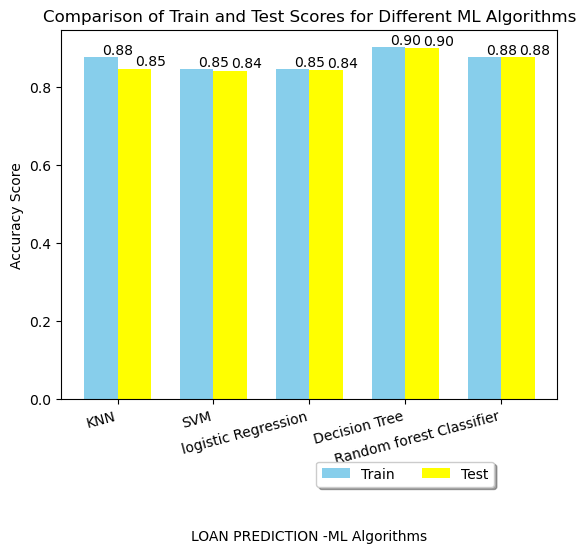

In [169]:
ML_algorithms = ['KNN', 'SVM', 'logistic Regression','Decision Tree','Random forest Classifier']
train_scores = [train_score_knn,train_score_SVM,train_score_LR,train_score_DT,train_score_RF ]
test_scores = [test_score_knn,test_score_SVM,test_score_LR,test_score_DT, test_score_RF]

# Set up positions for the bars
bar_width = 0.35
index = np.arange(len(ML_algorithms))

# Create a grouped bar chart
plt.bar(index, train_scores, width=bar_width, label='Train', color='skyblue')
plt.bar(index + bar_width, test_scores, width=bar_width, label='Test', color='yellow')

# Add labels and title
plt.xlabel('LOAN PREDICTION -ML Algorithms',labelpad=45)
plt.ylabel('Accuracy Score')
plt.title('Comparison of Train and Test Scores for Different ML Algorithms')
plt.xticks(index + bar_width / 2, ML_algorithms,rotation=15, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Display the actual scores at the center of the bars
for i, (train, test) in enumerate(zip(train_scores, test_scores)):
    plt.text(i + bar_width / 2, train, f'{train:.2f}', ha='center', va='bottom', color='black')
    plt.text(i + bar_width * 1.5, test, f'{test:.2f}', ha='center', va='bottom', color='black')

# Display the plot
plt.show()

## COMPARING THE CV SCORES

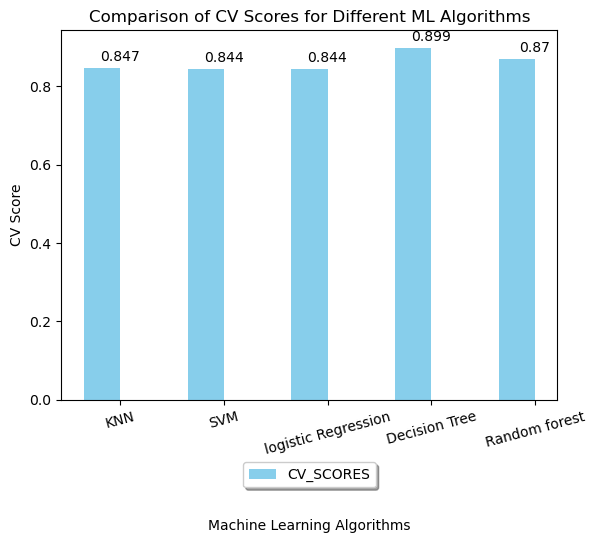

In [172]:
ML_algorithms = ['KNN', 'SVM', 'logistic Regression','Decision Tree','Random forest']
cv_scores = [CV_KNN,SVM_CV,LR_CV,DT_CV,RF_CV]

# Set up positions for the bars
bar_width = 0.35
index = np.arange(len(ML_algorithms))

plt.bar(index, cv_scores, width=bar_width, label='CV_SCORES', color='skyblue')

# Add labels and title
plt.xlabel('Machine Learning Algorithms',labelpad=45)
plt.ylabel('CV Score')
plt.title('Comparison of CV Scores for Different ML Algorithms')
plt.xticks(index + bar_width / 2, ML_algorithms, rotation=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

for i, score in enumerate(cv_scores):
    plt.text(index[i] + bar_width / 2, score + 0.01, round(score, 3), ha='center', va='bottom')


# Conclusion:

1. According to the CV_Scores of the above ML Algorithms, Decision Tree is the best.
2. The Accuracy of Decision Tree algorithm is also observed to be high